In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import re

In [2]:
test = pd.read_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-05-05\US Foods Update.csv')

In [3]:
test.head()

,Region,Area,Market,Pyramid Segment,Business Unit,Merch Category,PIM Group,MFG #,PIM #,ASYS #,...,Vendor,Brand,Brand Type,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Year Week,LB Current
0,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,FRIED APPETIZERS,"APPETIZERS, VEGETABLES OTHER, BREADED & BATTERED",10750947016097,90009498,5903991,...,MCCAIN FOODS USA,MONARCH,Exclusive Brand,-,-,-,-,-,202308,12.00
1,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,"HANDHELD, FROZEN & REF","SANDWICHES, FROZEN",10072714106887,4702841,4862793,...,MCCAIN FOODS USA,MCCAIN,National Brand,-,-,-,-,-,202313,75.00
2,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,NOT FRIED FROZEN POTATOES,"POTATOES, MASHED, FROZEN",10072714834568,1520875,8292377,...,MCCAIN FOODS USA,MCCAIN,National Brand,Quality: GOOD,POTATO TYPE: MASHED,SKIN ON/OFF: WHITE,FLAVOR TYPE: SKINLESS,-,202305,96.00
3,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,NOT FRIED FROZEN POTATOES,"POTATOES, MASHED, FROZEN",10072714834568,1520875,8292377,...,MCCAIN FOODS USA,MCCAIN,National Brand,Quality: GOOD,POTATO TYPE: MASHED,SKIN ON/OFF: WHITE,FLAVOR TYPE: SKINLESS,-,202306,360.00
4,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,NOT FRIED FROZEN POTATOES,"POTATOES, MASHED, FROZEN",10072714834568,1520875,8292377,...,MCCAIN FOODS USA,MCCAIN,National Brand,Quality: GOOD,POTATO TYPE: MASHED,SKIN ON/OFF: WHITE,FLAVOR TYPE: SKINLESS,-,202307,168.00


In [2]:
%%time

dir_path = r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files'

all_df = pd.DataFrame()

# Loop through all files and subdirectories under the directory
for root, dirs, files in os.walk(dir_path):
    for filename in files:
        # Get the full path of the file
        file_path = os.path.join(root, filename)

        #look for all files with US Foods and .csv in title
        pattern = r'.*US Foods.*\.csv$'

        if re.search(pattern, filename):
            # Read the CSV file into a temporary dataframe
            df_temp = pd.read_csv(file_path)

            #if not empty dataframe
            if not all_df.empty:
                #if column named "Year Week" found then only keep weeks that are not in main data file
                if 'Year Week' in df_temp:
                    unique_dates = all_df['Year Week'].unique()
                    df_temp = df_temp[df_temp['Year Week'].isin(unique_dates) == False]
                else:
                    df_temp = pd.DataFrame()
            
            # Concatenate the filtered data into the main dataframe
            if len(df_temp) > 0:
                all_df = pd.concat([all_df, df_temp], ignore_index=True)

all_df.head()

CPU times: total: 1min 1s
Wall time: 1min 5s


,Region,Area,Market,Pyramid Segment,Business Unit,Merch Category,PIM Group,MFG #,PIM #,ASYS #,...,Brand Type,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Year Week,LB Current,Director,Desk
0,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,FRIED FROZEN POTATOES,"POTATOES, FORMED PRODUCTS FROZEN",10072714937580,1252567,6512164,...,National Brand,Quality: GOOD,POTATO SUB CATEGORY: WHITE,POTATO CUT TYPE: ALL OTHER POTATO,POTATO CUT DESCRIPTION: CHOPPED AND FORMED,-,202102,18.00,NaN,NaN
1,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,FRIED FROZEN POTATOES,"POTATOES, FORMED PRODUCTS FROZEN",10072714937580,1252567,6512164,...,National Brand,Quality: GOOD,POTATO SUB CATEGORY: WHITE,POTATO CUT TYPE: ALL OTHER POTATO,POTATO CUT DESCRIPTION: CHOPPED AND FORMED,-,202109,36.00,NaN,NaN
2,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,Exclusive Brand,-,-,-,-,-,202102,30.00,NaN,NaN
3,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,Exclusive Brand,-,-,-,-,-,202103,430.00,NaN,NaN
4,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,Exclusive Brand,-,-,-,-,-,202104,20.00,NaN,NaN


In [4]:
all_df.shape

(611379, 25)

In [5]:
data_dict = pd.read_excel(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Distributor Sell-Out Dictionaries\US Foods - US.xlsx', 
                          sheet_name='SKU Mapping')

time_dict = pd.read_excel(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Distributor Sell-Out Dictionaries\Time Definitions.xlsx', 
                          sheet_name='time')

data_dict.head(3)

,Merch Cat#,Merch Category,PIM Grp#,PIM Group,Manufacturer Item Number,Product,Pack Size,Vend#,Vendor,Brand,Consolidated Category,L1 Product Hierarchy,L2 Product Hierarchy,McCain SKU ID
0,76.0,COOKIES,1433.0,"COOKIES, READY TO EAT, FROZEN",10072714003742,"COOKIE, SNDWH CHOC VNL CRM",6/4 LB,30.0,MCCAIN FOODS USA,MCCAIN,Prepared Foods,Local Portfolio,Bakery,1000004861
1,76.0,COOKIES,1433.0,"COOKIES, READY TO EAT, FROZEN",10072714006040,"COOKIE, SNDWH CHOC VNL CRM",6/4 LB,30.0,MCCAIN FOODS USA,SONIC,Prepared Foods,Local Portfolio,Bakery,1000007909
2,97.0,DESSERT BARS,1518.0,"BROWNIES, FROZEN",10072714105224,"BROWNIE, DBL CHOC NOT ICED",2/64 OZ,30.0,MCCAIN FOODS USA,MCCAIN,Prepared Foods,Local Portfolio,Bakery,15010522


In [6]:
dict_columns = ['Manufacturer Item Number','McCain SKU ID']
time_columns = ['Calendar Week Year','Week Ending (Sun)']

df = all_df.merge(data_dict[dict_columns], how='left', left_on=['MFG #'], right_on=['Manufacturer Item Number'])

df = df.merge(time_dict[time_columns], how='left', left_on=['Year Week'], right_on=['Calendar Week Year'])

df.head(3)

,Region,Area,Market,Pyramid Segment,Business Unit,Merch Category,PIM Group,MFG #,PIM #,ASYS #,...,Attribute 4,Attribute 5,Year Week,LB Current,Director,Desk,Manufacturer Item Number,McCain SKU ID,Calendar Week Year,Week Ending (Sun)
0,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,FRIED FROZEN POTATOES,"POTATOES, FORMED PRODUCTS FROZEN",10072714937580,1252567,6512164,...,POTATO CUT DESCRIPTION: CHOPPED AND FORMED,-,202102,18.00,NaN,NaN,10072714937580,MCF03758,202102,2021-01-17
1,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,FRIED FROZEN POTATOES,"POTATOES, FORMED PRODUCTS FROZEN",10072714937580,1252567,6512164,...,POTATO CUT DESCRIPTION: CHOPPED AND FORMED,-,202109,36.00,NaN,NaN,10072714937580,MCF03758,202109,2021-03-07
2,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,-,-,202102,30.00,NaN,NaN,50758108767183,1000006237,202102,2021-01-17


In [7]:
df.loc[~df['McCain SKU ID'].isna(), 'match'] = 1
df.loc[df['McCain SKU ID'].isna(), 'match'] = 0

<AxesSubplot:xlabel='match'>

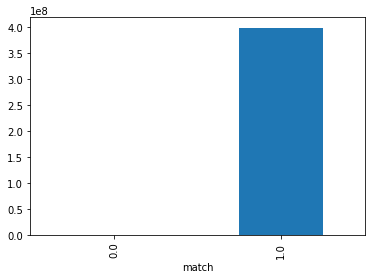

In [8]:
#matches any character that is not a digit (\d) or a period (.)
df.loc[:, 'LBS'] = df['LB Current'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)))

df.groupby(['match'])['LBS'].sum().plot(kind='bar')

In [9]:
df.columns

Index(['Region', 'Area', 'Market', 'Pyramid Segment', 'Business Unit',
       'Merch Category', 'PIM Group', 'MFG #', 'PIM #', 'ASYS #',
       'Product Description', 'Pack Size', 'Vendor #', 'Vendor', 'Brand',
       'Brand Type', 'Attribute 1', 'Attribute 2', 'Attribute 3',
       'Attribute 4', 'Attribute 5', 'Year Week', 'LB Current', 'Director',
       'Desk', 'Manufacturer Item Number', 'McCain SKU ID',
       'Calendar Week Year', 'Week Ending (Sun)', 'match', 'LBS'],
      dtype='object')

In [10]:
df['Week Ending (Sun)'].agg(['min','max'])

min   2021-01-17
max   2023-05-07
Name: Week Ending (Sun), dtype: datetime64[ns]

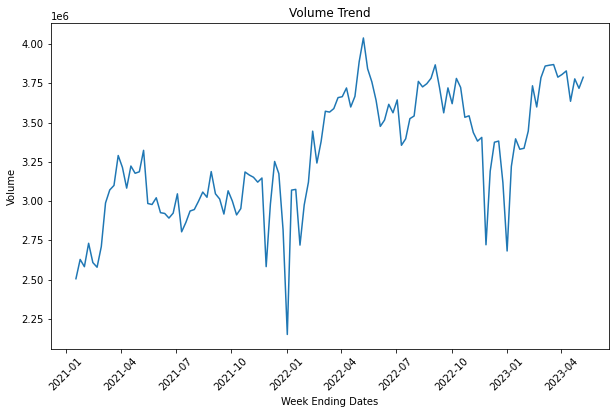

In [11]:
import matplotlib.pyplot as plt
import pandas as pd


graph_data = df.groupby('Week Ending (Sun)')['LBS'].sum().reset_index()

# Convert week ending dates to datetime objects
graph_data['Week Ending (Sun)'] = pd.to_datetime(graph_data['Week Ending (Sun)'])

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10,6))

# Create the line chart
ax.plot(graph_data['Week Ending (Sun)'], graph_data['LBS'])

# Set the x-axis label
ax.set_xlabel('Week Ending Dates')

# Set the y-axis label
ax.set_ylabel('Volume')

# Set the chart title
ax.set_title('Volume Trend')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

## Save Sell-Out Data

In [12]:
df.to_pickle(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Data Update\files\usfoods_sellout.csv')

In [32]:
orders = pd.read_pickle(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Trade Claims Deductions\ref\sales.pkl')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129898 entries, 0 to 3129897
Data columns (total 34 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   day_calendar_date         datetime64[ns]
 1   month_begin               datetime64[ns]
 2   month_id                  object        
 3   sales_order_id            object        
 4   po_number                 object        
 5   material_id               object        
 6   material_desc             object        
 7   category                  object        
 8   customer_material_id      object        
 9   plant_id                  object        
 10  plant_name                object        
 11  sold_to_id                object        
 12  sold_to_name              object        
 13  currency_id               object        
 14  netprice                  float32       
 15  sales_organisation_id     object        
 16  sold_to_l1_id             object        
 17  sold_to_

In [44]:
import datetime

def fiscal_quarter(x):
    if x >= 7 and x <= 9:
        return 1
    elif x >= 10 and x <= 12:
        return 2
    elif x >= 1 and x <= 3:
        return 3
    elif x >= 4 and x <= 6:
        return 4

orders = orders[(orders['sold_to_l1']=='US FOODS L1') & (orders['sales_organisation_id']=='US01')]

orders['year'] = orders['month_begin'].dt.year
orders['month'] = orders['month_begin'].dt.month

orders['day_calendar_date'] = pd.to_datetime(orders['day_calendar_date'])

orders['week_ending_sunday'] = orders['day_calendar_date'].apply(lambda x: x + pd.to_timedelta((6 - x.weekday()) % 7, unit='d'))

orders['fiscal_year'] = orders.apply(lambda x: x['year'] + 1 if x['month'] > 6 else x['year'], axis=1)
orders['fiscal_period'] = orders.apply(lambda x: x['month'] - 6 if x['month'] > 6 else x['month'] + 6, axis=1)
orders['fiscal_quarter'] = orders['month'].apply(fiscal_quarter)

orders.head()

,day_calendar_date,month_begin,month_id,sales_order_id,po_number,material_id,material_desc,category,customer_material_id,plant_id,...,shortedquantitycs,totalvalue,totalshortvalue,netcostlc,year,month,fiscal_year,fiscal_period,fiscal_quarter,week_ending_sunday
35,2020-01-01,2020-01-01,202001,6072209,1031905D,1000001542,MCCAIN SIGNATURE 3/8 SC SKIN ON 6X5,Potato,7141364,2252,...,0.0,24422.400391,0.0,13485.570312,2020,1,2020,7,3,2020-01-05
743,2020-01-02,2020-01-01,202001,6058462,9618554Q,1000001467,GCP BRD CD CHS POT BITES 4X3LB,Prepared Foods,9865114,2110,...,0.0,64.260002,0.0,34.330002,2020,1,2020,7,3,2020-01-05
744,2020-01-02,2020-01-01,202001,6058462,9618554Q,1000002997,D_CRW BRB THCK ON RINGS 6/2.5,Prepared Foods,7862756,2110,...,0.0,193.100006,0.0,157.330002,2020,1,2020,7,3,2020-01-05
745,2020-01-02,2020-01-01,202001,6058462,9618554Q,1000007587,USF 5/16 XL BEER FRIES 6X5LB,Potato,7731531,2110,...,0.0,5918.399902,0.0,2160.969971,2020,1,2020,7,3,2020-01-05
746,2020-01-02,2020-01-01,202001,6058462,9618554Q,40010016,MOR TAN 1/8 BRD ON SLVRS 6X2LB,Prepared Foods,7364995,2110,...,0.0,2816.100098,0.0,1196.410034,2020,1,2020,7,3,2020-01-05


In [46]:
orders.columns

Index(['day_calendar_date', 'month_begin', 'month_id', 'sales_order_id',
       'po_number', 'material_id', 'material_desc', 'category',
       'customer_material_id', 'plant_id', 'plant_name', 'sold_to_id',
       'sold_to_name', 'currency_id', 'netprice', 'sales_organisation_id',
       'sold_to_l1_id', 'sold_to_l1', 'sold_to_l2_id', 'sold_to_l2', 'on_tos',
       'route', 'ship_to_zone', 'orderedquantitycs', 'confirmedquantitycs',
       'orderedquantitylb', 'orderedquantitygrosslb', 'deliveredquantitycs',
       'deliveredquantitylb', 'deliveredquantitygrosslb', 'shortedquantitycs',
       'totalvalue', 'totalshortvalue', 'netcostlc', 'year', 'month',
       'fiscal_year', 'fiscal_period', 'fiscal_quarter', 'week_ending_sunday'],
      dtype='object')

In [36]:
orders['sold_to_name'].value_counts()

sold_to_name
US FOODS FORT MILL        8567
US FOODS GREENSBURG       7492
US FOODS ATLANTA          5942
US FOODS COLUMBIA         5827
US FOODS SAN FRANCISCO    5806
                          ... 
US FOODS ANCHORAGE         519
US FOODS SAN DIEGO         511
US FOODS LUBBOCK           416
US FOODS SIOUX FALLS       305
USF NEW ORLEANS             28
Name: count, Length: 72, dtype: int64

In [37]:
orders['category'].value_counts()

category
Potato            103643
Prepared Foods     80021
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


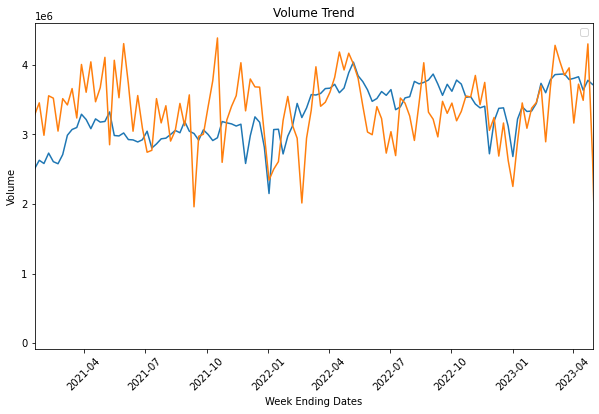

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

graph_data1 = df.groupby('Week Ending (Sun)')['LBS'].sum().reset_index()
graph_data2 = orders.groupby('week_ending_sunday')['deliveredquantitylb'].sum().reset_index()
# Convert week ending dates to datetime objects
graph_data1['Week Ending (Sun)'] = pd.to_datetime(graph_data1['Week Ending (Sun)'])

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10,6))

# Create the line chart
ax.plot(graph_data1['Week Ending (Sun)'], graph_data1['LBS'])
ax.plot(graph_data2['week_ending_sunday'], graph_data2['deliveredquantitylb'])

# Set the x-axis label
ax.set_xlabel('Week Ending Dates')

ax.set_xlim(graph_data1['Week Ending (Sun)'].min(), graph_data1['Week Ending (Sun)'].max())

# Set the y-axis label
ax.set_ylabel('Volume')

# Set the chart title
ax.set_title('Volume Trend')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()